# Нейронные сети и глубокое обучение

## Введение

**Нейросеть** — это математическая модель, вдохновленная работой человеческого мозга. Она состоит из множества связанных между собой искусственных нейронов, которые обрабатывают информацию и передают ее по сети. Каждый нейрон принимает входные данные, выполняет вычисления и передает результат следующему нейрону.

**Любая нейросеть** — это набор нейронов и связей между ними. Нейрон лучше всего представлять просто как функцию с кучей входов и одним выходом, нейрон -  это просто место, где происходит вычисление.

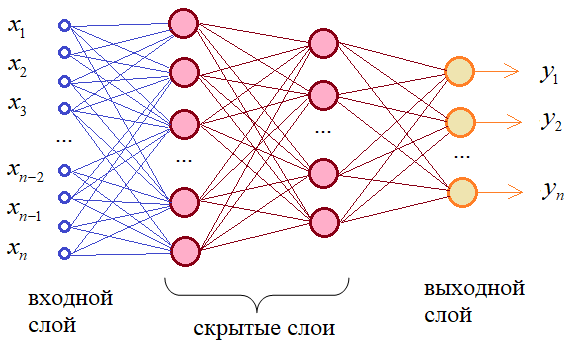

- **Нейрон** — это вычислительная единица, которая получает информацию, производит над ней простые вычисления и передает ее дальше.

- **Синапс** — это связь между двумя нейронами. У синапсов есть 1 параметр — **вес**.

- **Epochs** - Произошла одна эпоха (epoch) — весь датасет прошел через нейронную сеть в прямом и обратном направлении только один раз.

- Так как одна эпоха слишком велика для используемой вычислительной мощности, датасет делят на маленькие партии — **батчи**.

**Процесс работы нейросетей обычно включает следующие этапы:**

- **Входные данные:** Нейросети принимают входные данные, которые могут быть числами, изображениями, текстом и т. д.
- **Прямой проход:** Входные данные передаются через нейросеть от входного слоя к выходному слою. Каждый нейрон вычисляет взвешенную сумму своих входных данных и применяет функцию активации для получения выходного значения.
- **Обратное распространение ошибки:** Нейросеть сравнивает выходные данные с ожидаемыми результатами и вычисляет ошибку. Затем эта ошибка распространяется обратно по сети, корректируя веса связей между нейронами с помощью алгоритма градиентного спуска.
- **Обучение:** Нейросеть повторяет прямой проход и обратное распространение ошибки множество раз, чтобы оптимизировать веса связей. Чем больше данных используется для обучения, тем лучше нейросеть может выучить сложные взаимосвязи и прогнозировать результаты.

**По сути все обучение нейронной сети сводится к тому, чтобы найти все веса и смещения.**

**Фреймворки для создания и работы с нейросетями:**
- Keras/Tensorflow
- PyTorch

## Как работает нейронная сеть

**Компоненты нейронной сети**

**1. Гиперпараметры:**
- Архитектура
- Функция активации
- Функция потерь
- Метод оптимизации (функция оптимизации)
- Метрики качества

**2. Параметры:**
- веса нейронной сети и смещение $(W, b)$

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

### Архитектура нейронной сети

- сколько слоев, какие слои
- сколько нейронов
- какая у них функция активации
- и т.д.

**Давайте начнем с простого.**

**Что такое один нейрон?**

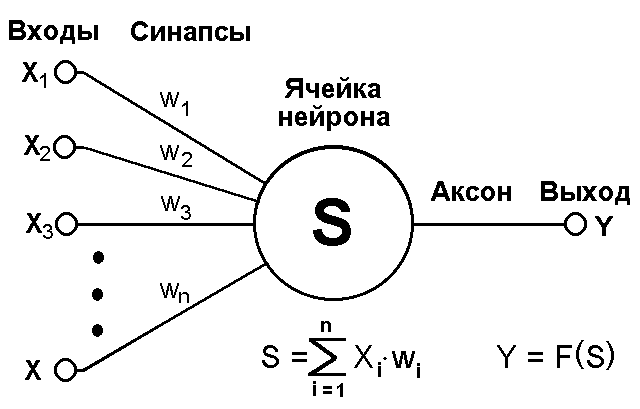

Один нейрон - это обычная линейная функция, которую мы уже проходили в линейной и логистической регрессии:

$$f(x) = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + b = XW + b$$

**Нейронная сеть - это много таких нейронов, которые связаны между собой и делают вычисления.**

Т.е. нейронная сеть - это **линейная модель**, но для того, чтобы она могла не только линейные связи искать вводят понятие **Функции активации**.

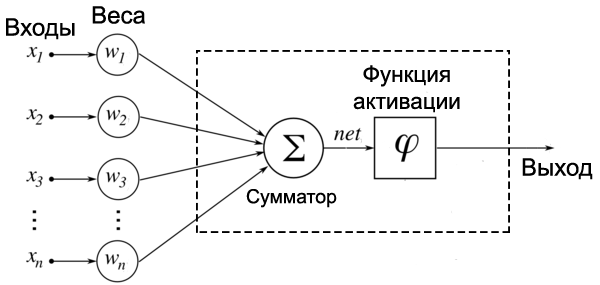

**Activation function**

Функции активации — это просто математические методы, которые переводят все значения в диапазон от 0 до 1, так что машине будет очень легче изучить данные в процессе их анализа. Поток Tensor поддерживает множество функций активации. Некоторые из наиболее часто используемых функций:

- Sigmoid
- Relu
- Softmax
- Swish
- Linear

Каждая функция активации имеет свои конкретные варианты использования и недостатки. Но функция активации, которая используется в скрытом и входном слоях, — это «Relu», а другая функция, которая будет иметь большее влияние на результат, — это потери

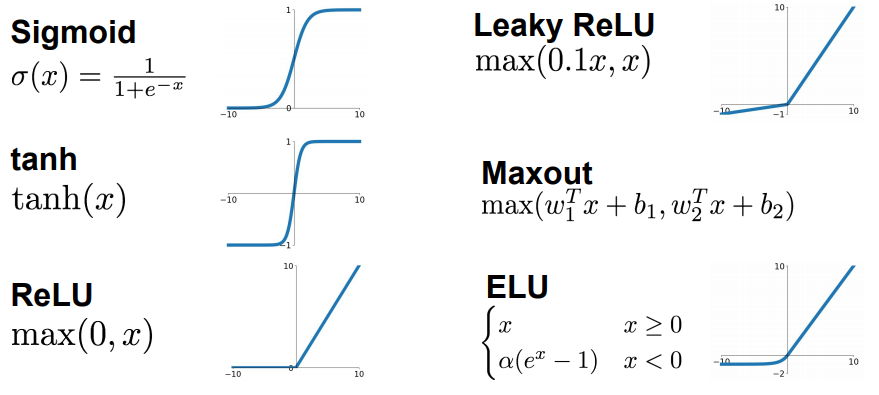

### Простой пример нейронной сети

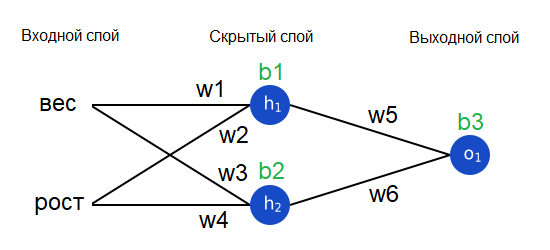

Пусть есть такая нейронная сеть.

**Т.е. у нас есть следующие матрицы:**

1. Вектор признаков: $X = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad = \begin{bmatrix} вес \\ рост \end{bmatrix} \quad $
2. Веса на скрытый слой: $W^{[1]} = \begin{bmatrix} w_1 & w_ 2\\ w_3 & w_4 \end{bmatrix} \quad $
3. Смещения скрытого слоя: $b^{[1]} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} \quad $

4. Веса на выход: $W^{[2]} = \begin{bmatrix} w_5\\ w_6 \end{bmatrix} \quad $

5. 3. Смещения выходного слоя: $b^{[2]} = \begin{bmatrix} b_3 \end{bmatrix} \quad $


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Определим модель
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Скрытый слой: 2 входа → 2 нейрона
        self.hidden = nn.Linear(2, 2)
        # Выходной слой: 2 входа → 1 выход
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = self.hidden(x)           # Линейная трансформация
        x = F.relu(x)                # Активация
        x = self.output(x)           # Выходной нейрон
        x = torch.sigmoid(x)         # Сигмоида — если задача классификации
        return x

# Пример использования
model = SimpleNN()

# Пример входа (один вектор с двумя признаками)
x = torch.tensor([[1.0, 2.0]])  # размер (1, 2)
output = model(x)
print("Выход сети:", output)

Выход сети: tensor([[0.5313]], grad_fn=<SigmoidBackward0>)


In [ ]:
model

SimpleNN(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
X = iris.data[:,:2]
X.shape

(150, 2)

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)
X_tensor[:2]

tensor([[5.1000, 3.5000],
        [4.9000, 3.0000]])

In [ ]:
output = model(X_tensor)
print("Выход сети:", output[:2])

Выход сети: tensor([[0.6171],
        [0.5964]], grad_fn=<SliceBackward0>)


In [ ]:
print(X_tensor.shape)
print(output.shape)

torch.Size([150, 2])
torch.Size([150, 1])


**Немного подробнее про PyTorch**

https://neurohive.io/ru/tutorial/glubokoe-obuchenie-s-pytorch/

### Обучение нейронной сети

Обучение нейросети происходит в два этапа:

- Прямое распространение ошибки (**forward**);
- Обратное распространение ошибки (**backward**).

Во время прямого распространения ошибки делается предсказание ответа. При обратном распространении ошибка между фактическим ответом и предсказанным минимизируется.

- какая функция потерь?
- какой метод оптимизации?
- какие метрики?

#### **Функция потери (loss function)**

Функция потерь находится в центре нейронной сети. Она используется для расчета ошибки между  реальными и полученными ответами. Наша глобальная цель — минимизировать эту ошибку. Таким образом, функция потерь эффективно приближает обучение нейронной сети к этой цели.

Функция потерь измеряет «насколько хороша» нейронная сеть в отношении данной обучающей выборки и ожидаемых ответов. Она также может зависеть от таких переменных, как веса и смещения.

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Mean Squared Logarithmic Error
- Средняя абсолютная ошибка в процентах (MAPE)
- Binary cross entropy
- Log loss (cross entropy loss)

#### **Методы оптимизации модели**

Чтобы свести к минимуму ошибку или потерю в прогнозировании, модель, используя примеры из обучающей выборки, обновляет параметры модели W.

Оптимизаторы используются для обновления весов и смещений, то есть внутренних параметров модели, чтобы уменьшить ошибку.

Самым важным методом и основой того, как мы обучаем и оптимизируем нашу модель, является метод Градиентного Спуска.

**Как происходит обновление весов с помощью градиентного спуска**

Градиент - показывает в сторону наискорейшего возрастания функции, т.е. чтобы найти минимум функции, мы берем отрицательный градиент.

**Градиент находит минимум функции - это и есть минимазация функции потерь.**

В алгоритме градиентного спуска мы начинаем со случайных параметров модели и вычисляем ошибку для каждой итерации обучения, продолжая обновлять параметры, чтобы приблизиться к минимальным значениям.

Какие методы бывают оптимизации:
- Adam
- SGD
- Adagrad

**Т.е. у нас есть параметры (веса) нашей нейронной сети:**

1. Вектор признаков: $X = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad $
2. Веса на скрытый слой: $W^{[1]} = \begin{bmatrix} w_1 & w_ 2\\ w_3 & w_4 \end{bmatrix} \quad $
3. Смещения скрытого слоя: $b^{[1]} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} \quad $

4. Веса на выход: $W^{[2]} = \begin{bmatrix} w_5 \\ w_6 \end{bmatrix} \quad $

5. 3. Смещения выходного слоя: $b^{[2]} = \begin{bmatrix} b_1 \end{bmatrix} \quad $

**Нам надо найти все оптимальные параметры нашей нейронной сети, чтобы ответ нейронной сети был максимально близко к истинному**

### **Процесс обучения с точки зрения математики**

Пусть начальные данные такие:

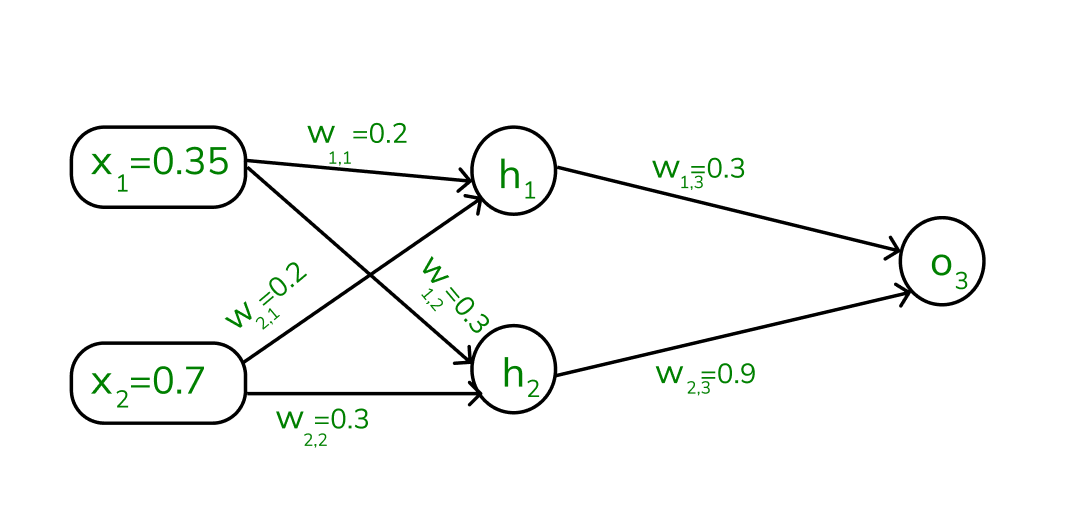

1. **Инициализация весов**

Обычно веса и смещения инициализируют случайно (например, из нормального распределения).

2. **Прямой проход (Forward pass)**

- Шаг 1: скрытый слой. Линейная комбинация + смещение:

$$z^{[1]} = W^{[1]}*X + b^{[1]} = \begin{bmatrix} z_1 \\ z_2 \end{bmatrix} \quad$$

$$z_1 = w_1*x_1 + w_2*x_2 + b_1$$
$$z_2 = w_3*x_1 + w_4*x_2 + b_2$$

- Шаг 2: передаем выходы с первого слоя в функции активации:

$$a^{[1]} = \sigma (z^{[1]}) = \begin{bmatrix} a^1_1 \\ a^1_2 \end{bmatrix} \quad$$

- Шаг 3: выходной слой

$$z^{[2]} = W^{[2]}*a^{[1]} + b^{[2]} = \begin{bmatrix} z_3 \end{bmatrix} \quad$$

$$z^3 = w_5*a^1_1 + w_6*a^1_2 +b_3$$

- Шаг 4: передаем выходы с первого слоя в функции активации:

$$a^{[2]} = \sigma (z^{[2]})$$

**$a^{[2]}$ - это и есть наш итоговый ответ нейронной сети.**

3. **Функция потерь**

Считаем получившееся значение ошибки с помощью функции потерь:

$$L = MSE = \frac{1}{2N} (\hat y - y)^2$$

где, $\hat y = a^{[2]}$ - предсказание нейронной сети, $y$ - истинное значение.

*Какая производная у это функции?*

4. **Обратное распространение (backward pass)**

Теперь мы хотим минимизировать наши ошибки, т.е. найти такие веса, при которых MSE минимально. Будем использовать для этого градиентный спуск:

**Теперь считаем с конца**

- Шаг 1. Градиент по выходному слою

- Шаг 1.1: Градиент по весам второго слоя $W^{[2]} \in R^{2 \times 1}$ по цепному правилу:

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{\partial L}{\partial a^{[2]}} * \frac{\partial a^{[2]}}{\partial z^{[2]}} * \frac{\partial z^{[2]}}{\partial W^{[2]}}$$

Так как $W^{[2]} = \begin{bmatrix} w_5 \\ w_6 \end{bmatrix} \quad $, то:

$$\begin{equation*}
\frac{\partial L}{\partial W^{[2]}} =
 \begin{cases}
   \frac{\partial L}{\partial w_5} = \frac{\partial L}{\partial z^{[2]}} * a^1_1\\
   \frac{\partial L}{\partial w_6} = \frac{\partial L}{\partial z^{[2]}} * a^1_2
 \end{cases}
\end{equation*}$$

Т.е. градиент по весам в текущем слое - это выход предыдущего слоя умножить на градиент ошибки текущего слоя.

- Шаг 1.2: Градиент по смещению второго слоя:

$$\frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial a^{[2]}} * \frac{\partial a^{[2]}}{\partial z^{[2]}} * \frac{\partial z^{[2]}}{\partial b^{[2]}}$$

- Шаг 2: Градиенты для первого слоя

- Шаг 2.1: Градиент по весам первого слоя $W^{[1]}$:

$$ \frac{\partial L}{\partial W^{[1]}} = \frac{\partial L}{\partial a^{[2]}} * \frac{\partial a^{[2]}}{\partial z^{[2]}} * \frac{\partial z^{[2]}}{\partial a^{[1]}} * \frac{\partial a^{[1]}}{\partial z^{[1]}} * \frac{\partial z^{[1]}}{\partial W^{[1]}}$$

5. **Оптимизация весов**

- Второй (выходной) слой:

$$W^{[2]} = W^{[2]} - \lambda * \frac{\partial L}{\partial W^{[2]}}$$

$$b^{[2]} = b^{[2]} - \lambda * \frac{\partial L}{\partial b^{[2]}}$$

- Первый слой:

$$W^{[1]} = W^{[1]} - \lambda * \frac{\partial L}{\partial W^{[1]}}$$

$$b^{[1]} = b^{[1]} - \lambda * \frac{\partial L}{\partial b^{[1]}}$$

In [28]:
import numpy as np

# Вход
X = np.array([[0.35], [0.7]])  # вход как столбец

# Веса и смещения скрытого слоя
W1 = np.array([[0.2, 0.3],     # 2 нейрона: по 2 входа каждый
               [0.2, 0.3]])

b1 = np.array([[1.0], [1.0]])

# Веса и смещения выходного слоя
W2 = np.array([[0.3, 0.9]])    # 1 выход, 2 входа
b2 = np.array([[1.0]])

# Истинный ответ
y = np.array([[0.5]])

In [29]:
# Сигмоида и её производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

# FORWAR
# 1. Скрытый слой
z1 = W1 @ X + b1
a1 = sigmoid(z1)

# 2. Выходной слой
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

# 3. Потери
loss = 0.5 * (a2 - y)**2

In [30]:
print("z1 =\n", z1)
print("a1 =\n", a1)
print("z2 =\n", z2)
print("a2 (y_hat) =\n", a2)
print("loss =\n", loss)

z1 =
 [[1.28]
 [1.28]]
a1 =
 [[0.78244978]
 [0.78244978]]
z2 =
 [[1.93893973]]
a2 (y_hat) =
 [[0.87423562]]
loss =
 [[0.07002615]]


In [31]:
# Градиент функции потерь по предсказанию
dL_da2 = a2 - y                        # ∂L/∂a2
da2_dz2 = sigmoid_deriv(z2)           # ∂a2/∂z2
dz2_dW2 = a1.T                        # ∂z2/∂W2
dz2_db2 = 1                           # ∂z2/∂b2

# Градиенты выходного слоя
dL_dz2 = dL_da2 * da2_dz2             # ∂L/∂z2
dL_dW2 = dL_dz2 @ a1.T                # ∂L/∂W2
dL_db2 = dL_dz2                       # ∂L/∂b2

# Градиенты скрытого слоя
dz2_da1 = W2.T                        # ∂z2/∂a1
da1_dz1 = sigmoid_deriv(z1)           # ∂a1/∂z1

dL_dz1 = dz2_da1 * dL_dz2 * da1_dz1   # ∂L/∂z1
dL_dW1 = dL_dz1 @ X.T                 # ∂L/∂W1
dL_db1 = dL_dz1                       # ∂L/∂b1

In [32]:
lr = 0.1  # learning rate

# Обновляем веса
W2 -= lr * dL_dW2
b2 -= lr * dL_db2

W1 -= lr * dL_dW1
b1 -= lr * dL_db1

In [35]:
# НОВЫЕ ВЕСА

print('Веса выходного слоя')
print(W2)
print('Смещение выходного слоя')
print(b2)
print('Веса первого слоя')
print(W1)
print('Смещение первого слоя')
print(b1)

Веса выходного слоя
[[0.29678051 0.89678051]]
Смещение выходного слоя
[[0.99588537]]
Веса первого слоя
[[0.19992646 0.29985292]
 [0.19977937 0.29955875]]
Смещение первого слоя
[[0.99978988]
 [0.99936964]]


### **Процесс обучения с точки зрения кода**

In [39]:
def train(model, X_train, y_train, epochs=1000, lr=0.01):
    criterion = nn.BCELoss()  # Функция потерь
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)  # Оптимизатор

    for epoch in range(epochs):
        # ставим модель в режим обучения
        model.train()

        # Прямой проход
        outputs = model(X_train)

        # Вычисление ошибки
        loss = criterion(outputs, y_train)

        # Обнуление градиентов
        optimizer.zero_grad()

        # Обратное распространение
        loss.backward()

        # Шаг оптимизации
        optimizer.step()

        # Вывод прогресса
        if (epoch+1) % 100 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [40]:
# Подготовим данные

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

# Загрузка данных
iris = load_iris()
X = iris.data[:, :2]  # только 2 признака
y = (iris.target == 0).astype(float)  # бинарная классификация: только класс 0

# Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Перевод в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [41]:
model = SimpleNN()
train(model, X_train_tensor, y_train_tensor, epochs=1000, lr=0.1)

Epoch 1/1000, Loss: 0.6251
Epoch 100/1000, Loss: 0.2915
Epoch 200/1000, Loss: 0.1500
Epoch 300/1000, Loss: 0.0932
Epoch 400/1000, Loss: 0.0616
Epoch 500/1000, Loss: 0.0425
Epoch 600/1000, Loss: 0.0308
Epoch 700/1000, Loss: 0.0241
Epoch 800/1000, Loss: 0.0199
Epoch 900/1000, Loss: 0.0170
Epoch 1000/1000, Loss: 0.0149


Про обучение на PyTorch

https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

In [42]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy.item() * 100:.2f}%")

Accuracy: 100.00%


# Про сохранение моделей

In [ ]:
# под kerad
model.save('16_model_2.h5') # .pth
model.save('16_model_3', save_format='h5')
model_loaded = keras.models.load_model('16_model_2.h5')

**Методы get_weights(), set_weights() и save_weights(), load_weights()**

Довольно часто требуется извлекать и задавать коэффициенты для отдельных слоев или модели в целом,  а также сохранять их на диск и загружать с диска. Это достаточно просто сделать, с помощью методов:

- get_weights() – получение коэффициентов модели / слоя;
- set_weights() – установка коэффициентов модели / слоя;
- save_weights() – запись коэффициентов модели / слоя на носитель;
- set_weights() – загрузка коэффициентов модели / слоя с носителя.

In [ ]:
# под torch
torch.save(model.state_dict(), 'model_weights.pth')
model.load_state_dict(torch.load('model_weights.pth'))

In [ ]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')